# Python para finanças - risco de ações

Conteúdo da aula:
*  Variância, desvio padrão e coeficiente de variação
* Covariância e correlação
* Riscos em portfólio de ações
* Risco sistemático e não sistemático

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##  Importação da base de dados

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
2131,2023-09-05,6.89,2.43,35.910000,2.690000,27.730000,113.620003
2132,2023-09-06,6.70,2.31,35.549999,2.590000,27.760000,112.250000
2133,2023-09-08,6.69,2.34,35.400002,2.510000,27.700001,111.660004
2134,2023-09-11,6.68,2.37,35.279999,2.550000,28.030001,113.480003


In [3]:
dataset.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,14.653633,25.727432,18.813801,6.523371,18.844237,83.947523
std,9.168014,16.793498,13.372466,7.413298,9.485981,24.197715
min,1.160000,2.200000,4.942307,0.030585,7.156402,36.450001
25%,7.640000,13.777500,6.897115,0.687500,10.179825,61.680000
50%,12.480000,20.290000,9.842500,3.730000,14.086568,90.424999
75%,20.392499,40.905000,33.583752,9.136250,28.100000,105.279997
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


## Cálculo dos retornos anuais

### 2015

In [4]:
dataset['CVC'][dataset['Date'] == '2015-01-02'], dataset['CVC'][dataset['Date'] == '2015-12-30']

(0    15.2
 Name: CVC, dtype: float64,
 244    13.5
 Name: CVC, dtype: float64)

In [5]:
np.log(13.5 / 15.2) * 100

-11.86057424078469

In [6]:
dataset['MGLU'][dataset['Date'] == '2015-01-02'], dataset['MGLU'][dataset['Date'] == '2015-12-30']

(0    0.232812
 Name: MGLU, dtype: float64,
 244    0.068945
 Name: MGLU, dtype: float64)

In [7]:
np.log(0.06 / 0.23) * 100

-134.37347467010946

In [12]:
# **Criando uma função para facilitar o processo**
# def retorno_anual_logaritmico(dataset, nome_acao, data_inicial, data_final):
#     preco_inicial = dataset[nome_acao][dataset['Date'] == data_inicial]
#     preco_final = dataset[nome_acao][dataset['Date'] == data_final]
    
#     return np.log(round(preco_final.iloc[0],3)/ round(preco_inicial.iloc[0],3)) * 100

In [11]:
# cvc_2015 = retorno_anual_logaritmico(dataset, 'CVC', '2015-01-02', '2015-12-30')
# print('2015 - CVC: ', cvc_2015)

# mglu_2015 = retorno_anual_logaritmico(dataset, 'MGLU', '2015-01-02', '2015-12-30')
# print('2015 - MGLU: ', mglu_2015)

### 2016

In [13]:
dataset['CVC'][dataset['Date'] == '2016-01-04'], dataset['CVC'][dataset['Date'] == '2016-12-29']

(245    12.53
 Name: CVC, dtype: float64,
 493    23.700001
 Name: CVC, dtype: float64)

In [14]:
np.log(23.70 / 12.53) * 100

63.73492792331087

In [15]:
dataset['MGLU'][dataset['Date'] == '2016-01-04'], dataset['MGLU'][dataset['Date'] == '2016-12-29']

(245    0.070117
 Name: MGLU, dtype: float64,
 493    0.414726
 Name: MGLU, dtype: float64)

In [16]:
np.log(0.41 / 0.07) * 100

176.76619176489942

### 2017

In [18]:
dataset['CVC'][dataset['Date'] == '2017-01-02'], dataset['CVC'][dataset['Date'] == '2017-12-29']

(494    23.02
 Name: CVC, dtype: float64,
 Series([], Name: CVC, dtype: float64))

In [19]:
np.log(48.50 / 23.02) * 100

74.5200394649701

In [20]:
dataset['MGLU'][dataset['Date'] == '2017-01-02'], dataset['MGLU'][dataset['Date'] == '2017-12-29']

(494    0.397304
 Name: MGLU, dtype: float64,
 Series([], Name: MGLU, dtype: float64))

In [21]:
np.log(2.50 / 0.39) * 100

185.78992717326

### 2018

In [22]:
dataset['CVC'][dataset['Date'] == '2018-01-02'], dataset['CVC'][dataset['Date'] == '2018-12-28']

(740    49.880001
 Name: CVC, dtype: float64,
 980    61.18
 Name: CVC, dtype: float64)

In [23]:
np.log(61.18 / 49.88) * 100

20.420021791092157

In [24]:
dataset['MGLU'][dataset['Date'] == '2018-01-02'], dataset['MGLU'][dataset['Date'] == '2018-12-28']

(740    2.478125
 Name: MGLU, dtype: float64,
 980    5.658437
 Name: MGLU, dtype: float64)

In [25]:
np.log(5.65 / 2.47) * 100

82.74373945184638

### 2019

In [26]:
dataset['CVC'][dataset['Date'] == '2019-01-02'], dataset['CVC'][dataset['Date'] == '2019-12-30']

(981    61.099998
 Name: CVC, dtype: float64,
 1215    43.799999
 Name: CVC, dtype: float64)

In [27]:
np.log(43.79 / 61.09) * 100

-33.29427058483686

In [28]:
dataset['MGLU'][dataset['Date'] == '2019-01-02'], dataset['MGLU'][dataset['Date'] == '2019-12-30']

(981    5.812187
 Name: MGLU, dtype: float64,
 1215    11.925
 Name: MGLU, dtype: float64)

In [29]:
np.log(11.92 / 5.81) * 100

71.8637090773384

### 2020

In [30]:
dataset['CVC'][dataset['Date'] == '2020-01-02'], dataset['CVC'][dataset['Date'] == '2020-11-03']

(1216    44.709999
 Name: CVC, dtype: float64,
 1425    11.88
 Name: CVC, dtype: float64)

In [31]:
np.log(12.42 / 44.70) * 100

-128.06654251141904

In [32]:
dataset['MGLU'][dataset['Date'] == '2020-01-02'], dataset['MGLU'][dataset['Date'] == '2020-11-03']

(1216    12.3325
 Name: MGLU, dtype: float64,
 1425    24.99
 Name: MGLU, dtype: float64)

In [33]:
np.log(25.30 / 12.33) * 100

71.87690785572217

## Variância

A variância é útil para determinar o afastamento da média que os dados de um conjunto analisado apresentam. Para isso, determina-se o valor médio das diferenças quadradas da média

**Utilizaremos a variância para identificar o quanto o preço varia em relação a média, com isso teremos uma ideia da volatilidade da ação, empresas muito volateis acarretam em mais risco. Empresas menos volateis tendem a ser mais conservadoras.**

Primeiro, calculamos a média aritmética do conjunto

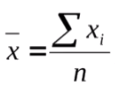

Agora calculamos a variância

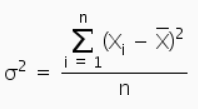

Onde,

* sigma ao quadrado: variância
* xi: valor analisado
* : média aritmética do conjunto
* n: número de dados do conjunto



In [35]:
taxas_cvc = np.array([-11.86, 63.73, 74.52, 20.42, -33.29, -128.06])

In [36]:
# calculando a média
media_cvc = taxas_cvc.sum() / len(taxas_cvc)
media_cvc

-2.423333333333332

In [37]:
# podemos calcular a média utilizando a função mean()
media_cvc = taxas_cvc.mean()
media_cvc

-2.423333333333332

In [38]:
# calculando a variância
((taxas_cvc - media_cvc) ** 2).sum() / len(taxas_cvc)

4607.455288888889

In [39]:
# podemos calcular a variância utilizando a função var()
variancia_cvc = taxas_cvc.var()
variancia_cvc

4607.455288888889

In [40]:
taxas_mglu = np.array([-134.37, 176.76, 185.78, 82.74, 71.86, 71.87])

In [41]:
media_mglu = taxas_mglu.mean()
media_mglu

75.77333333333333

In [42]:
variancia_mglu = taxas_mglu.var()
variancia_mglu

11089.846455555555

Também podemos calcular a variação de outros valores, como o preço:

In [47]:
dataset['CVC'].tail(30).var(), dataset['MGLU'].tail(30).var()

(0.053551731833100275, 0.04272747796661966)

## Desvio padrão

O desvio padrão é uma medida que expressa o **grau de dispersão de um conjunto de dados**. Ou seja, o desvio padrão indica o **quanto um conjunto de dados é uniforme**. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.

Para calcular o desvio padrão, basta tirar a raiz quadrada da variância conforme a figura abaixo:

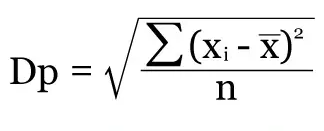

O desvio padrão nos mostra de forma mais simples a volatilidade das ações.

In [48]:
desvio_padrao_cvc = math.sqrt(variancia_cvc)
desvio_padrao_cvc

67.87823869907712

In [51]:
# podemos realizar o mesmo calculo utilizando a função .std()
taxas_cvc.std()

67.87823869907712

In [49]:
desvio_padrao_mglu = math.sqrt(variancia_mglu)
desvio_padrao_mglu

105.30833991453648

In [50]:
taxas_mglu.std()

105.30833991453648

Também podemos calcular o desvio padrão de outros valores, como o preço:

In [52]:
dataset['CVC'].tail(330).std(), dataset['MGLU'].tail(330).std()

(2.264893979038608, 0.6716284542351961)

## Coeficiente de variação

O coeficiente de variação (CV) é uma medida de dispersão utilizada na área da Estatística para relacionar o desvio-padrão e a média aritmética de um conjunto de dados. Como essa medida é expressa em porcentagem, é possível utilizá-la para comparar a variabilidade de conjuntos de dados distintos que envolvam grandezas diferentes.

Podemos calcular o coeficiente de variação dividindo o desvio padrão pela média e multiplicando por 100 conforme imagem a seguir: 

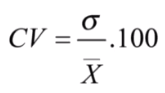

In [53]:
desvio_padrao_cvc, media_cvc

(67.87823869907712, -2.423333333333332)

In [54]:
coeficiente_variacao_cvc = (desvio_padrao_cvc / media_cvc) * 100
coeficiente_variacao_cvc

-2801.0277317363334

In [55]:
# Podemos calcular o coeficiente de variação utilizando a função variation() do módulo stats da biblioteca scipy.
stats.variation(taxas_cvc) * 100

-2801.0277317363334

In [56]:
stats.variation(taxas_mglu) * 100

138.97810124212978

## Cálculos com todas as ações - risco médio anual

In [57]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2131,6.89,2.43,35.910000,2.690000,27.730000,113.620003
2132,6.70,2.31,35.549999,2.590000,27.760000,112.250000
2133,6.69,2.34,35.400002,2.510000,27.700001,111.660004
2134,6.68,2.37,35.279999,2.550000,28.030001,113.480003


In [58]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2131,-0.047026,-0.058139,-0.006089,-0.032374,-0.007516,-0.004556
2132,-0.027576,-0.049383,-0.010025,-0.037175,0.001082,-0.012058
2133,-0.001493,0.012987,-0.004219,-0.030888,-0.002161,-0.005256
2134,-0.001495,0.012821,-0.003390,0.015936,0.011913,0.016299


In [61]:
taxas_retorno.std() * 100

GOL     4.854106
CVC     3.870506
WEGE    2.179789
MGLU    4.276082
TOTS    2.459624
BOVA    1.613259
dtype: float64

In [64]:
taxas_retorno.std() * 246

GOL     11.941101
CVC      9.521445
WEGE     5.362282
MGLU    10.519162
TOTS     6.050674
BOVA     3.968618
dtype: float64

In [65]:
math.sqrt(246) # Anualizar

15.684387141358123

In [68]:
taxas_retorno.std() * math.sqrt(246)

GOL     0.761337
CVC     0.607065
WEGE    0.341887
MGLU    0.670677
TOTS    0.385777
BOVA    0.253030
dtype: float64

## Correlação entre ações

In [69]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2131,6.89,2.43,35.910000,2.690000,27.730000,113.620003
2132,6.70,2.31,35.549999,2.590000,27.760000,112.250000
2133,6.69,2.34,35.400002,2.510000,27.700001,111.660004
2134,6.68,2.37,35.279999,2.550000,28.030001,113.480003


In [70]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2131,-0.047026,-0.058139,-0.006089,-0.032374,-0.007516,-0.004556
2132,-0.027576,-0.049383,-0.010025,-0.037175,0.001082,-0.012058
2133,-0.001493,0.012987,-0.004219,-0.030888,-0.002161,-0.005256
2134,-0.001495,0.012821,-0.003390,0.015936,0.011913,0.016299


A **covariância** é uma medida estatística onde é possível comparar duas variáveis, permitindo **entender como elas se relacionam entre si**

Se o sinal for **negativo**, significa que as variáveis têm **relação oposta** (enquanto uma aumenta, a outra diminui). 
Já se o sinal for **positivo**, significa que a **relação também é positiva** (enquanto uma aumenta, a outra também aumenta).

In [71]:
taxas_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002356,0.001027,0.000326,0.000734,0.000412,0.000458
CVC,0.001027,0.001498,0.000236,0.000619,0.000327,0.000333
WEGE,0.000326,0.000236,0.000475,0.000269,0.000211,0.000182
MGLU,0.000734,0.000619,0.000269,0.001828,0.000356,0.000317
TOTS,0.000412,0.000327,0.000211,0.000356,0.000605,0.000199
BOVA,0.000458,0.000333,0.000182,0.000317,0.000199,0.000260


In [77]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxas_retorno.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.546455,0.308228,0.353521,0.345389,0.584609
CVC,0.546455,1.000000,0.279242,0.374270,0.343813,0.533207
WEGE,0.308228,0.279242,1.000000,0.288411,0.394450,0.518872
MGLU,0.353521,0.374270,0.288411,1.000000,0.338859,0.460052
TOTS,0.345389,0.343813,0.394450,0.338859,1.000000,0.500251
BOVA,0.584609,0.533207,0.518872,0.460052,0.500251,1.000000


A tabela abaixo indica como devemos interpretar os valores do coeficiente de correlação 
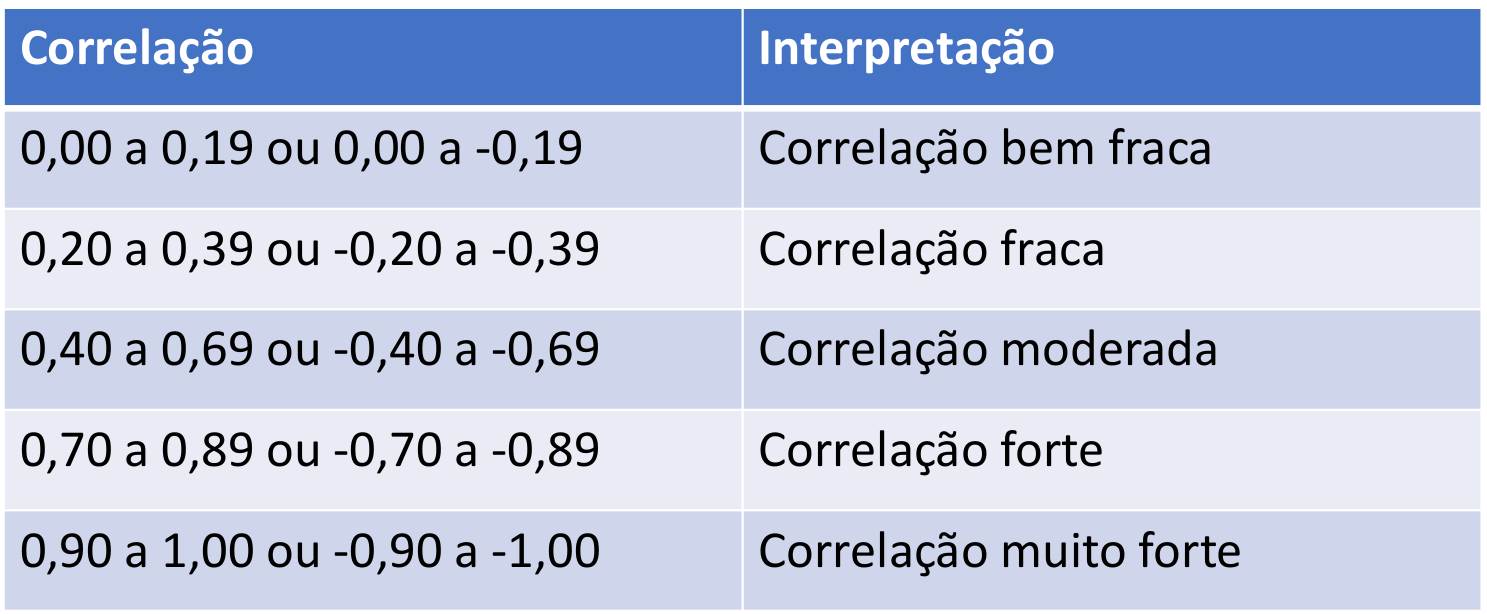

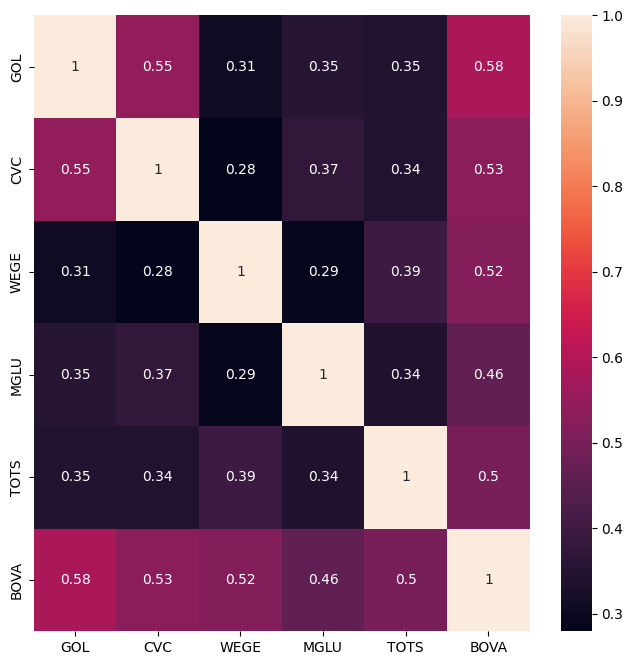

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco de um portfólio

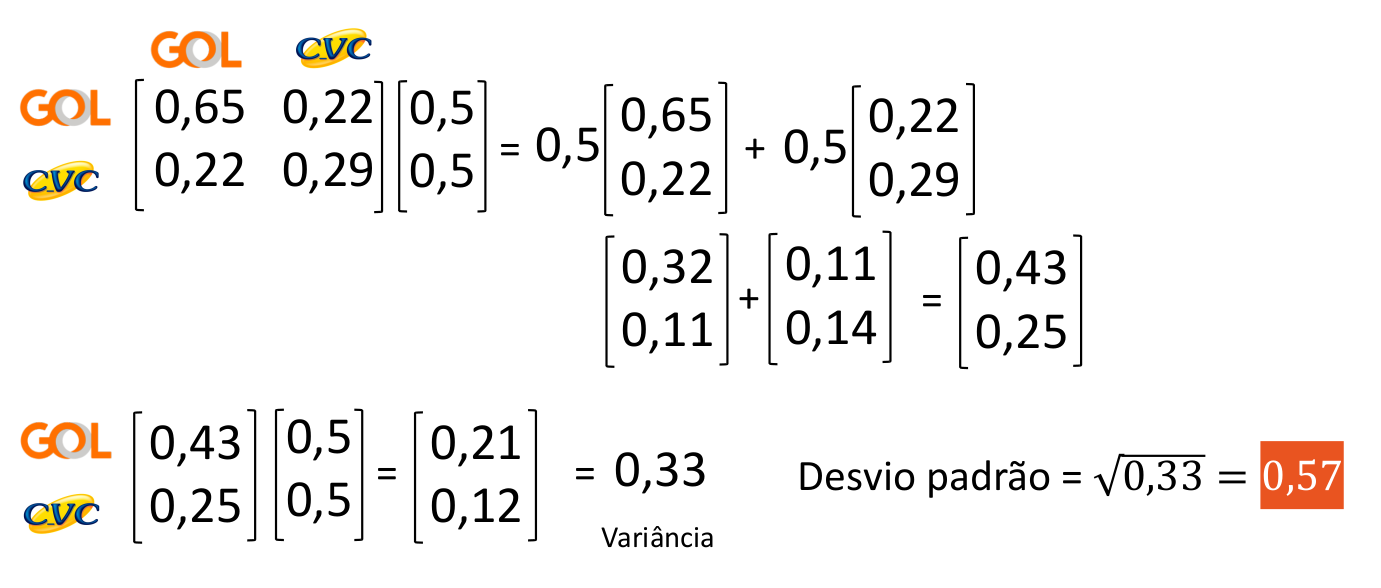

### Somente duas ações

In [74]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2131,-0.047026,-0.058139,-0.006089,-0.032374,-0.007516,-0.004556
2132,-0.027576,-0.049383,-0.010025,-0.037175,0.001082,-0.012058
2133,-0.001493,0.012987,-0.004219,-0.030888,-0.002161,-0.005256
2134,-0.001495,0.012821,-0.003390,0.015936,0.011913,0.016299


In [75]:
taxas_retorno_gol_cvc = taxas_retorno.drop(columns = ['WEGE', 'MGLU', 'TOTS', 'BOVA'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
...,...,...
2131,-0.047026,-0.058139
2132,-0.027576,-0.049383
2133,-0.001493,0.012987
2134,-0.001495,0.012821


In [78]:
taxas_retorno_gol_cvc.cov()

,GOL,CVC
GOL,0.002356,0.001027
CVC,0.001027,0.001498


In [79]:
taxas_retorno_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.579634,0.252561
CVC,0.252561,0.368528


In [80]:
pesos = np.array([0.5, 0.5])

In [81]:
np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos)

array([0.41609746, 0.31054467])

In [82]:
np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))

0.3633210627907876

In [83]:
math.sqrt(np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))) * 100

60.27611988099329

### Todas as ações

In [84]:
dataset.columns

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [85]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [86]:
pesos1.sum()

1.0

In [87]:
taxas_retorno.cov() * 246

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.579634,0.252561,0.080229,0.180512,0.101443,0.112620
CVC,0.252561,0.368528,0.057956,0.152382,0.080518,0.081904
WEGE,0.080229,0.057956,0.116886,0.066131,0.052025,0.044886
MGLU,0.180512,0.152382,0.066131,0.449808,0.087673,0.078071
TOTS,0.101443,0.080518,0.052025,0.087673,0.148824,0.048831
BOVA,0.112620,0.081904,0.044886,0.078071,0.048831,0.064024


In [88]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.23887575, 0.1823891 , 0.07464545, 0.18730133, 0.09409666,
       0.07326238])

In [89]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.15546165839209175

In [92]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.394286264523749

In [93]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [94]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.06402408918933901

In [95]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.25302981877505865

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [96]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2131,-0.047026,-0.058139,-0.006089,-0.032374,-0.007516,-0.004556
2132,-0.027576,-0.049383,-0.010025,-0.037175,0.001082,-0.012058
2133,-0.001493,0.012987,-0.004219,-0.030888,-0.002161,-0.005256
2134,-0.001495,0.012821,-0.003390,0.015936,0.011913,0.016299


In [97]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

In [98]:
pesos2

array([0., 0., 0., 0., 0., 1.])

In [104]:
taxas_retorno.var() * 246

GOL     0.579634
CVC     0.368528
WEGE    0.116886
MGLU    0.449808
TOTS    0.148824
BOVA    0.064024
dtype: float64

In [105]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

GOL     0.115927
CVC     0.073706
WEGE    0.023377
MGLU    0.089962
TOTS    0.029765
BOVA    0.000000
dtype: float64

In [106]:
sub1 = - variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5] #Atualizado: 02/05/2021
sub1

-0.3327360182542241

In [107]:
variancia_portfolio1

0.15546165839209175

In [103]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.48819767664631586

In [108]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

GOL     0.000000
CVC     0.000000
WEGE    0.000000
MGLU    0.000000
TOTS    0.000000
BOVA    0.064024
dtype: float64

In [109]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.0640240891893391

In [110]:
variancia_portfolio2

0.06402408918933901

In [111]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.1280481783786781

Com isso, concluimos que para calcular o risco de uma carteira podemos utilizar os calculos da variancia e volatilidade do portfolio junto com o risco não sistemático.